In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/Global_Data.csv")

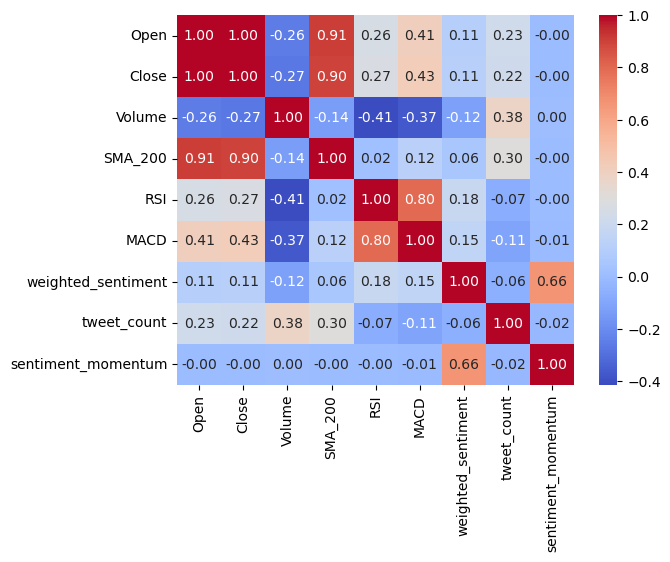

In [19]:
# Convertir la columna 'Date' a tipo de dato datetime (si no lo está ya)
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Seleccionar las columnas numéricas que te interesan
columnas_seleccionadas = ['Open','Close','Volume','SMA_200', 'RSI', 'MACD', 'weighted_sentiment', 'tweet_count', 'sentiment_momentum']
df_seleccionado = df[columnas_seleccionadas]

# Crear el heatmap de correlación
sns.heatmap(df_seleccionado.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Mostrar el heatmap
plt.show()


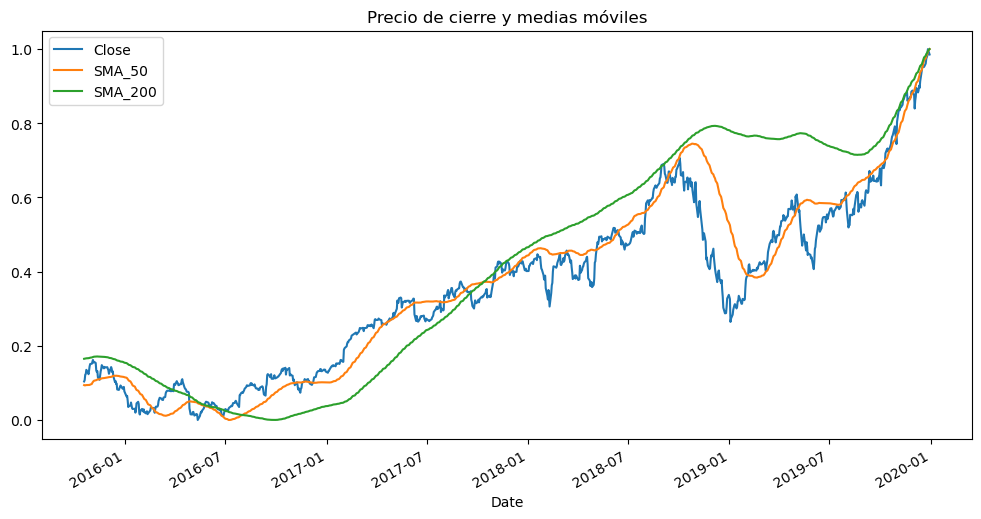

In [21]:
# Gráfico de series temporales
df[['Close', 'SMA_50', 'SMA_200']].plot(figsize=(12,6))
plt.title('Precio de cierre y medias móviles')
plt.show()

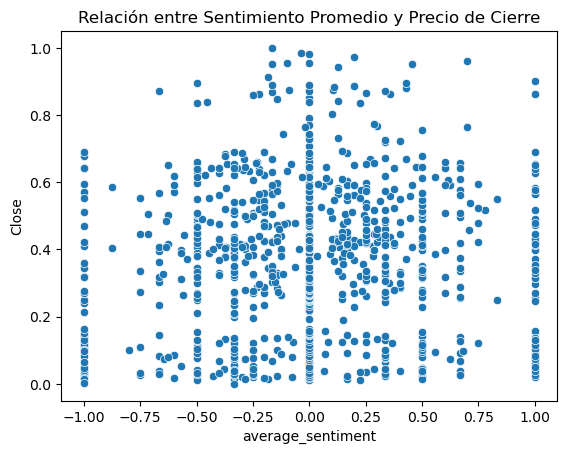

In [20]:
# Gráfico de correlación entre el sentimiento promedio y el precio de cierre
sns.scatterplot(data=df, x='average_sentiment', y='Close')
plt.title('Relación entre Sentimiento Promedio y Precio de Cierre')
plt.show()

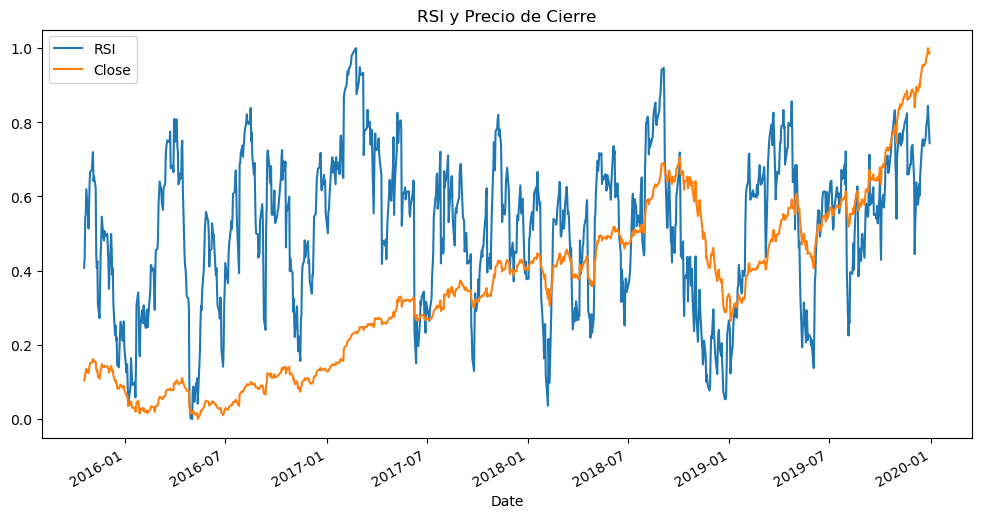

In [23]:
# Comparación de RSI y precios de cierre
df[['RSI', 'Close']].plot(figsize=(12,6))
plt.title('RSI y Precio de Cierre')
plt.show()
